In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from glob import iglob
from qvalue import estimate
FDRTHRESH = 0.05

Number of proteins evaluated:  49
Number of variants evluated: 1398

FDR Significant:  18
    Clustered:  18
    Dispersed:   0


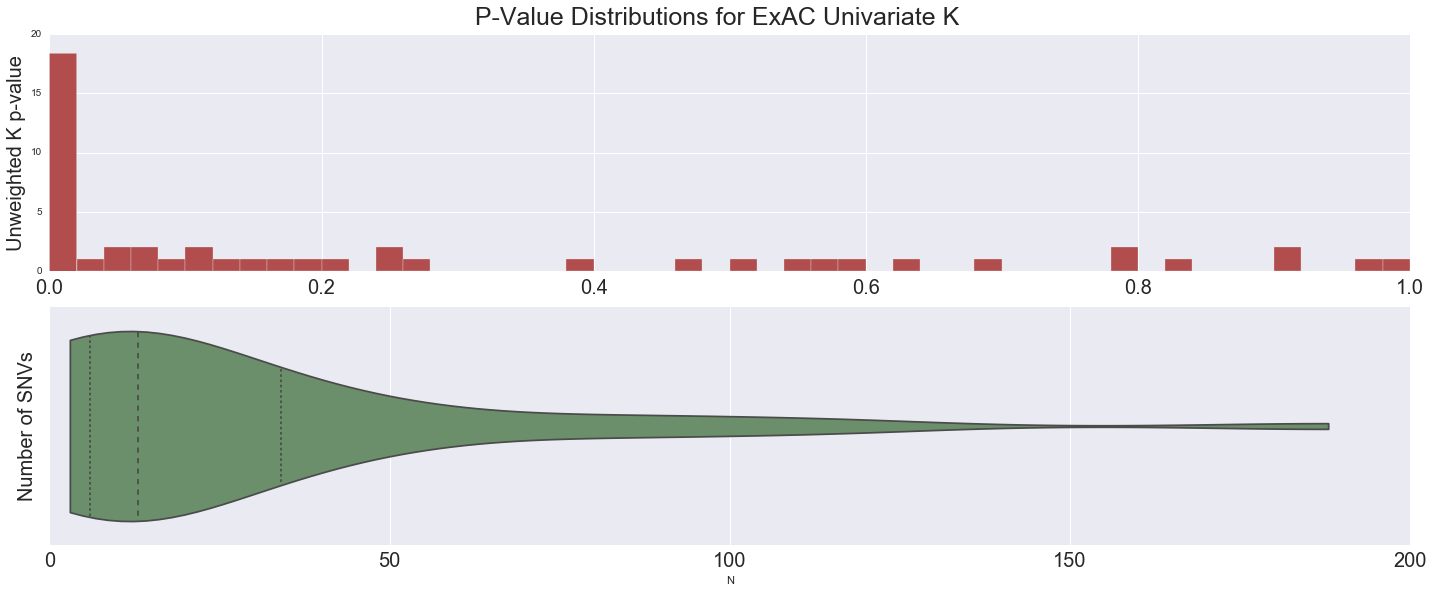

In [20]:
# Load the ExAC nsSNV results
df  = pd.read_csv("/Volumes/doux/pdbmap/results/specialK_analysis_2016-08-09/hgmd_ar/aap_K_summary.txt",delimiter='\t')
df  = df.drop_duplicates(["structid","chain"])
print "Number of proteins evaluated: %3d"%len(df)
print "Number of variants evluated: %4d"%np.sum(df["N"])
df.ix[~df[ "Kp"].isnull(), "Kq"], K_lam, K_pi = estimate(df.ix[~df[ "Kp"].isnull(), "Kp"].values)
print "\nFDR Significant: %3d"%(df["Kq"]<FDRTHRESH).sum()
print "    Clustered: %3d"%((df['Kq']<FDRTHRESH) & (df["Kz"]>0)).sum()
print "    Dispersed: %3d"%((df['Kq']<FDRTHRESH) & (df["Kz"]<0)).sum()
# P-Value Distributions
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))
fig,ax = plt.subplots(2,1,figsize=(20,8))
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("P-Value Distributions for ExAC Univariate K",fontsize=25,y=1.02)
ax[0].set_ylabel("Unweighted K p-value",fontsize=20)
ax[0].hist(df["Kp"],bins=np.arange(0,1.02,0.02),color=pal[0],normed=True)
if K_lam:
    ax[0].plot(K_lam,K_pi,lw=3,c='black')
sns.violinplot(df["N"],color=pal[2],inner='quart',ax=ax[1],cut=0)
ax[1].set_ylabel("Number of SNVs",fontsize=20)
plt.tight_layout()
plt.show()

In [21]:
print "Number of structures evaluated:"
print len(df)
print "Number of variants evluated:"
print "%.0f"%np.sum(df["N"])

from qvalue import estimate

df.ix[~df[ "Kp"].isnull(), "Kq"],K_lam,K_pi = estimate(df.ix[~df[ "Kp"].isnull(), "Kp"].values)

print "\nProteins passing an FDR of %.0f%% for the unweighted analysis"%(FDRTHRESH*100)
print "Significant:   %4d"%( df['Kq']<FDRTHRESH).sum()
print "    Clustered: %4d"%((df['Kq']<FDRTHRESH) & (df["Kz"]>0)).sum()
print "    Dispersed: %4d"%((df['Kq']<FDRTHRESH) & (df["Kz"]<0)).sum()

Number of structures evaluated:
49
Number of variants evluated:
1398

Proteins passing an FDR of 5% for the unweighted analysis
Significant:     18
    Clustered:   18
    Dispersed:    0


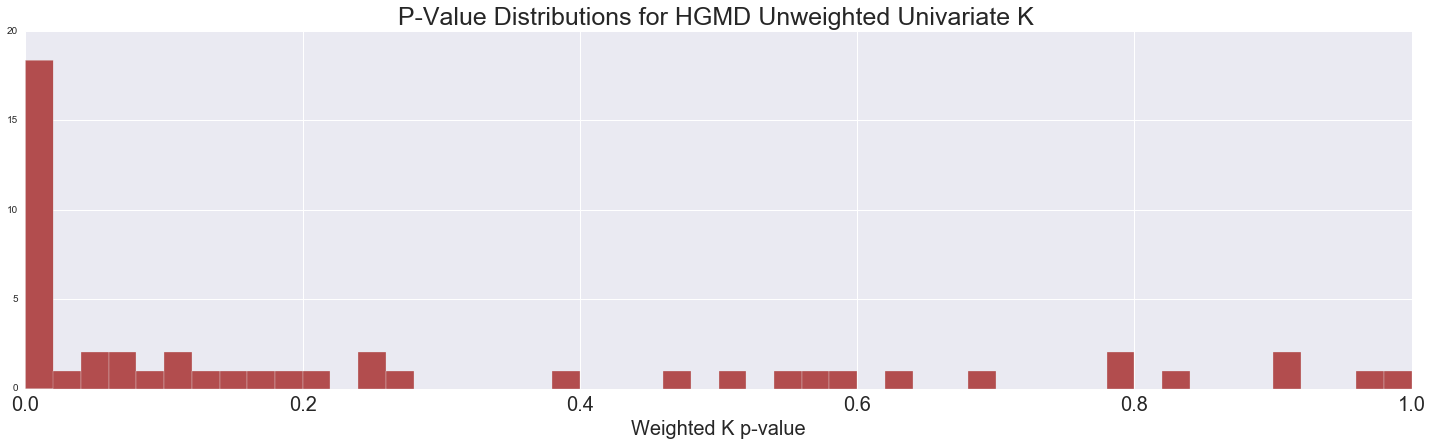

In [22]:
# P-Value Distributions
pal = list(sns.color_palette("Set1", n_colors=1, desat=.5))
fig,ax = plt.subplots(1,1,figsize=(20,6))
plt.suptitle("P-Value Distributions for HGMD Unweighted Univariate K",fontsize=25,y=1.02)
ax.set_xlabel("Weighted K p-value",fontsize=20)
ax.hist(df["Kp"],bins=np.arange(0,1.02,0.02),color=pal[0],normed=True)
# ax.plot(wK_lam,wK_pi,lw=3,c='black')
plt.tight_layout()
plt.show()

In [23]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All              (N=%4d)'%len(df)
    dft = dfx[dfx["Kq"]<FDRTHRESH].copy()
    dft['fdr'] = 'FDR < %.2f (N=%4d)'%(FDRTHRESH,len(dft))
    df = pd.concat((df,dft)).dropna(subset=["Kz"])
    df['dummy'] = ''
    return df

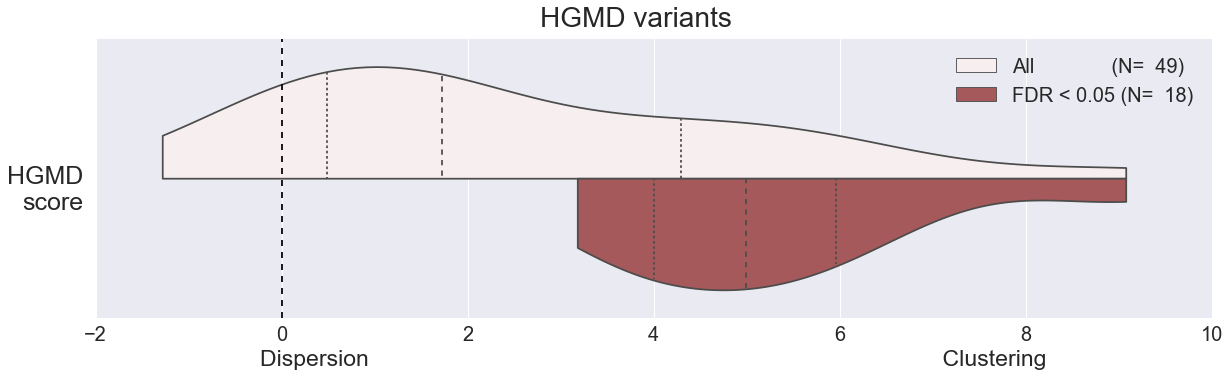

In [24]:
# Setup the plot
fig,ax = plt.subplots(figsize=(20,5),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))

# Plot the FDR-significant K for RSA-weighted residues
tdf = prep_split(df)
sns.violinplot(x='Kz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[0],split=True,scale='width',cut=0,ax=ax)
tdf.ix[tdf['fdr']!='FDR < %.2f'%FDRTHRESH,'Kz'] = np.nan
ax.set_ylabel("HGMD\nscore",fontsize=25,rotation='horizontal',ha='right',y=0.37)
handles, labels = ax.get_legend_handles_labels()
ax.legend(fontsize=20,handles=handles[:2])
ax.axvline(0.,ls='dashed',c='black')
plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*90,' '*0),fontsize=23)
plt.suptitle("HGMD variants",fontsize=28,y=0.99)
plt.show()

In [25]:
print "Un-Weighted: FDR-Significantly Clustered Proteins"
print df.ix[(df["Kq"]<FDRTHRESH) & (df["Kz"]>0),["structid","chain","Kz","Kp","Kq"]].sort_values(by="Kp")

Un-Weighted: FDR-Significantly Clustered Proteins
   structid chain        Kz       Kp        Kq
48     1DMW     A  5.777691  0.00002  0.000122
46     4FDJ     A  9.014002  0.00002  0.000122
25     1EKG     A  6.616061  0.00002  0.000122
44     4L3V     B  6.028583  0.00002  0.000122
43     1FSU     A  9.077018  0.00002  0.000122
35     2J6L     F  5.186433  0.00002  0.000122
41     2GK1     G  6.407849  0.00002  0.000122
47     3GXM     A  5.562983  0.00002  0.000122
45     1XMI     D  4.520270  0.00004  0.000218
38     2I3C     A  5.324191  0.00010  0.000490
34     3PDF     A  4.754933  0.00012  0.000535
36     3K71     D  4.803987  0.00044  0.001797
42     2YOB     A  3.913331  0.00056  0.002111
16     4A11     B  4.289980  0.00214  0.007490
40     3GD7     C  3.569808  0.00258  0.008428
32     3IKM     D  3.473798  0.00356  0.010903
20     4CDG     B  3.619568  0.00600  0.017294
19     3P0L     A  3.179617  0.01406  0.038274


In [26]:
print "Un-Weighted: FDR-Significantly Dispersed Proteins"
print df.ix[(df["Kq"]<FDRTHRESH) & (df["Kz"]<0),["structid","chain","Kz","Kp","Kq"]].sort_values(by="Kp")

Un-Weighted: FDR-Significantly Dispersed Proteins
Empty DataFrame
Columns: [structid, chain, Kz, Kp, Kq]
Index: []
